In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [2]:
df = pd.read_csv("train_processed.csv").drop(["dateid", "name", "weather"], axis=1)

In [36]:
exp = setup(df, target="y", session_id=7, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,7
1,Target,y
2,Original Data,"(337, 40)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,36
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(235, 52)"


In [37]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,11.1632,221.1287,14.7234,0.3494,0.2331,0.1908,0.1410
gbr,Gradient Boosting Regressor,11.3214,234.9573,15.1369,0.3135,0.2363,0.1935,0.0150
ridge,Ridge Regression,11.5869,234.9386,15.1685,0.2969,0.2404,0.1983,0.0050
br,Bayesian Ridge,11.7924,237.1321,15.2783,0.2918,0.2420,0.2021,0.0050
ada,AdaBoost Regressor,11.5958,233.9283,15.1306,0.2679,0.2399,0.2005,0.0170
lasso,Lasso Regression,12.1331,258.9459,15.8360,0.2635,0.2484,0.2089,0.0050
lr,Linear Regression,11.7137,249.8939,15.5731,0.2614,0.2445,0.1998,0.2610
lightgbm,Light Gradient Boosting Machine,12.1279,254.3655,15.7540,0.2610,0.2510,0.2119,0.0080
xgboost,Extreme Gradient Boosting,11.8178,246.1901,15.5546,0.2424,0.2484,0.2032,0.0370
huber,Huber Regressor,11.9959,260.5161,16.0181,0.1852,0.2540,0.2051,0.0070


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [38]:
model = create_model("rf")
# model = create_model("br")
# model = create_model("lasso")
# model = create_model("ridge")
# model = create_model("gbr")
# model = create_model("xgboost")
# model = create_model("lightgbm")
# model = create_model("ada")
# model = create_model("omp")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.1525,136.0098,11.6623,0.4253,0.1721,0.1494
1,11.4475,358.7358,18.9403,0.3497,0.2868,0.1762
2,11.8408,225.1326,15.0044,0.4955,0.2464,0.2091
3,10.8504,191.8443,13.8508,0.1708,0.2562,0.2202
4,11.4862,206.2757,14.3623,0.6859,0.1992,0.1773
5,11.4404,190.4630,13.8008,0.1780,0.2575,0.2331
6,9.8857,161.2222,12.6973,0.0459,0.2182,0.1727
7,13.4991,319.7727,17.8822,0.2985,0.2313,0.1858
8,12.1013,223.3602,14.9452,0.3624,0.2560,0.2208


In [39]:
tuned_model = tune_model(model, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.3492,114.3242,10.6922,0.5169,0.1607,0.1368
1,11.2387,343.6214,18.5370,0.3771,0.2777,0.1774
2,11.4535,239.6865,15.4818,0.4629,0.2502,0.2001
3,10.6870,191.1362,13.8252,0.1739,0.2497,0.2101
4,9.7574,152.0237,12.3298,0.7685,0.1753,0.1534
5,10.2249,174.1403,13.1962,0.2485,0.2492,0.2103
6,8.9579,146.0600,12.0855,0.1357,0.2067,0.1570
7,12.9144,297.8447,17.2582,0.3466,0.2203,0.1754
8,12.1098,223.0263,14.9341,0.3633,0.2524,0.2160


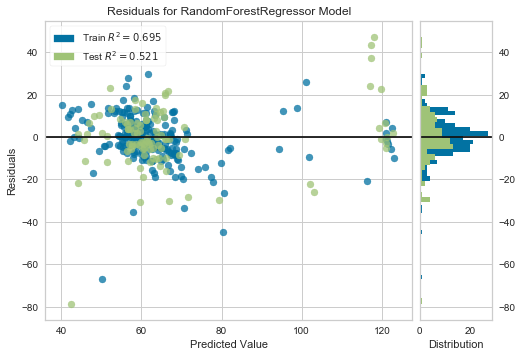

In [40]:
plot_model(tuned_model)

In [34]:
final_model = finalize_model(tuned_model)

In [35]:
df_pred = pd.read_csv("test_processed.csv")
df_dateid = df_pred["dateid"]
df_pred = df_pred.drop(["dateid", "name", "weather"], axis=1)
df_pred = predict_model(final_model, data=df_pred)
df_submit = pd.concat([df_dateid, df_pred["Label"]], axis=1)
df_submit.columns = ["dateid", "y"]
df_submit.to_csv("submit.csv", index=False, header=False)